In [10]:
import os 
import shutil 

data_path=r'D:\Machine learning for data analysis\EDA Dataset\COVID-19_Radiography_Dataset'
classes=os.listdir(data_path)
print(classes)
                    

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


In [11]:
dataset={}
for c in classes:
    path=data_path+ "\\" +c
    dataset[c]=len(os.listdir(path))
dataset

{'COVID': 3616, 'Lung_Opacity': 6012, 'Normal': 10192, 'Viral Pneumonia': 1345}

<BarContainer object of 4 artists>

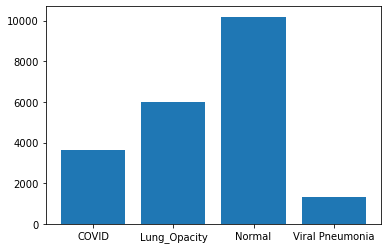

In [12]:
import matplotlib.pyplot as plt
plt.bar(dataset.keys(),dataset.values())

The dataset is heavily imbalanced. Under sampling is performed to **normal**  and **Lung Opacity** class and over sampling is performed to **COVID,  and Viral Pneumonia**

## A combination of oversampling and undersampling

### Under sampling to Normal,Lung Opacity

In [13]:
import random 
random.seed(42)

n=random.sample(range(1,10191),4000)

In [14]:
print(n[:10])

[1825, 410, 4507, 4013, 3658, 2287, 1680, 8936, 1425, 9675]


###  Random Under Sampling - For Normal class 

In [16]:
#moving the images in the randomly generated indices to a new location and  from there they can be used to train the model
normal_class=os.listdir(data_path+ "\\" +'Normal')
source=data_path+ "\\" +'Normal'
destination=r'D:\Machine learning for data analysis\EDA Dataset\COVID_final\Normal'



for i in n:
    shutil.move(os.path.join(source,normal_class[i]),   # source path
                 os.path.join(destination,normal_class[i])) #destination
    

### Random Under Sampling - For Lung Opacity

In [18]:
random.seed(44)
n1=random.sample(range(1,6012),4000)

In [20]:
LungOpacity_class=os.listdir(data_path+ "\\" +'Lung_Opacity')
source=data_path+ "\\" +'Lung_Opacity'
destination=r'D:\Machine learning for data analysis\EDA Dataset\COVID_final\Lung_Opacity'

for i in n1:
    shutil.move(os.path.join(source,LungOpacity_class[i]),   # source path
                 os.path.join(destination,LungOpacity_class[i])) #destination
    

## Oversampling of Viral Pneumonia

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Datagen=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

D:\ML\envs\ssd\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ML\envs\ssd\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ML\envs\ssd\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ML\envs\ssd\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

Storing the augmented images in a new place

In [26]:
import cv2

destination=r'D:\Machine learning for data analysis\EDA Dataset\COVID_final\Viral Pneumonia'
source=data_path+'\\'+'Viral Pneumonia'
i=0

for img in os.listdir(source):
    img_path=directory + "\\"+img
    x=cv2.imread(img_path)
    x = x.reshape((1, ) + x.shape)
    if i==1340:
        break
    i+=1
    augmented=Datagen.flow(x, batch_size=1, shuffle=True, save_to_dir=destination, save_prefix='aug',
    save_format='png')
    
    next(augmented)

## Visualization of Dataset size after balancing

<BarContainer object of 4 artists>

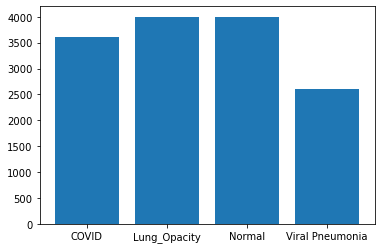

In [27]:
x=os.listdir(r'D:\Machine learning for data analysis\EDA Dataset\COVID_final')
y=[]
for c in x:
    y.append(len(os.listdir(os.path.join(r'D:\Machine learning for data analysis\EDA Dataset\COVID_final',c))))
plt.bar(x,y)  

Dataset for the classes is almost balanced except Viral Pneumonia this is because oversampling more than this might overfit the data.